# 4.9 Intro to data visualization with python


## 0.1 Importing data and libraries

In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Import data
path = r"C:\Users\quinn\PycharmProjects\Instacart Basket Analysis 06-30-2021"
customer_merged = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'customer_merged.pkl'))
df_cust = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'customers.csv'))

In [22]:
customer_merged.head()

,user_id,First Name,Surnam,Gender,STATE,Age,date_joined,Number_of_dependents,family_status,income,...,price_range_loc,busiest_day,busiest_period_of_day,max_order,loyalty_flag,mean_prices,spending_flag,median_order,Order_flag,exists
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Low-range product,Regularly busy,Average orders,8,New customer,7.988889,High spender,19.0,Regular customer,both
1,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Mid-range product,Regularly busy,Average orders,8,New customer,7.988889,High spender,19.0,Regular customer,both
2,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Mid-range product,Least busy,Fewest orders,8,New customer,7.988889,High spender,19.0,Regular customer,both
3,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Low-range product,Least busy,Fewest orders,8,New customer,7.988889,High spender,19.0,Regular customer,both
4,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Mid-range product,Least busy,Fewest orders,8,New customer,7.988889,High spender,19.0,Regular customer,both


## 0.2 Makeing plots

# I have done the work i will just make the graphs with out all the extra steps

<AxesSubplot:>

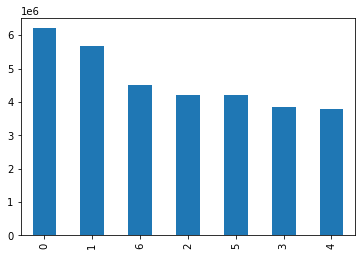

In [33]:
# bar graph or plot
customer_merged['orders_day_of_week'].value_counts().plot.bar()

<AxesSubplot:>

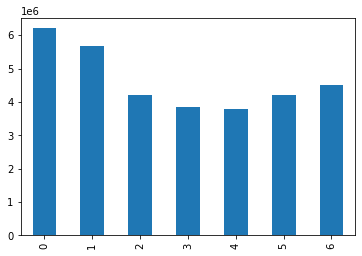

In [5]:
# The numbers goint in order
customer_merged['orders_day_of_week'].value_counts().sort_index().plot.bar()

<AxesSubplot:ylabel='Frequency'>

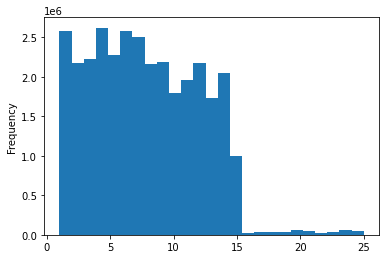

In [20]:
#creating a histogram
customer_merged['prices'].plot.hist(bins = 25)

### creating a sample

In [21]:
np.random.seed(4)

In [23]:
dev = np.random.rand(len(customer_merged)) <= 0.7

In [24]:
big = customer_merged[dev]

In [25]:
small = customer_merged[~dev]

In [26]:
len(customer_merged)

32404859

In [28]:
len(big)+len(small)

32404859

In [30]:
# creating a line chart
df_2 = small[['orders_day_of_week','prices']]

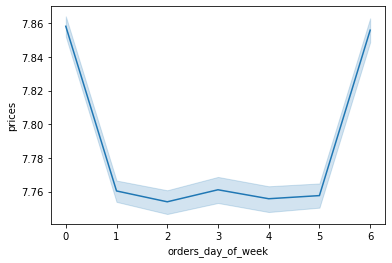

In [32]:
line = sns.lineplot(data = df_2, x = 'orders_day_of_week',y = 'prices')

## Creating a histogram about order hour of day

In [7]:
customer_merged['order_hour_of_day'].value_counts(dropna=False)

10    2761760
11    2736140
14    2689136
15    2662144
13    2660954
12    2618532
16    2535202
9     2454203
17    2087654
8     1718118
18    1636502
19    1258305
20     976156
7      891054
21     795637
22     634225
23     402316
6      290493
0      218769
1      115700
5       87961
2       69375
4       53242
3       51281
Name: order_hour_of_day, dtype: int64

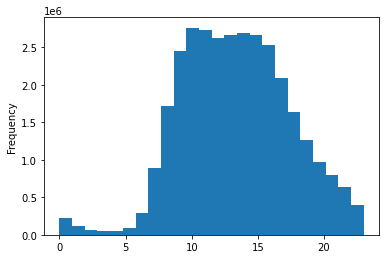

In [3]:
customer_frequency_hours = customer_merged['order_hour_of_day'].plot.hist(bins = 24)

In [4]:
customer_frequency_hours.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'customer_frequency_hours.png'))

### It show the frequency people order by day time so around that after noon to dinner time it is very busy

## creating a loyalty flag bar graph

In [5]:
customer_merged['loyalty_flag'].value_counts()

Regular customer    15876776
Loyal customer      10284093
New customer         6243990
Name: loyalty_flag, dtype: int64

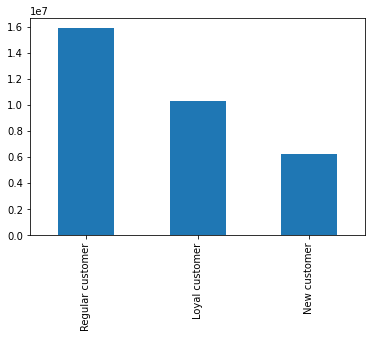

In [6]:
bar_loyalty_flag = customer_merged['loyalty_flag'].value_counts().plot.bar()

In [7]:
bar_loyalty_flag.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_loyalty_flag.png'))

## Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day. (Hint: To check this, you need to use an accurate sample for your line chart!)

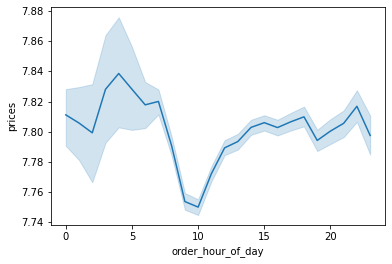

In [13]:
line_price = sns.lineplot(data = customer_merged, x = 'order_hour_of_day',y = 'prices')

In [16]:
line_price.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_price.png'))

## Now that you have information about customers, you need to conduct some exploratory analysis of customer demographics to inform the targeted marketing campaigns. First, determine whether there’s a connection between age and family status by creating a line chart exploring the connections between age and number of dependents:

In [32]:
df_cust.rename(columns = {'n_dependants' : 'Number_of_dependents'}, inplace = True)

In [33]:
df_cust.rename(columns = {'fam_status' : 'family_status'}, inplace = True)

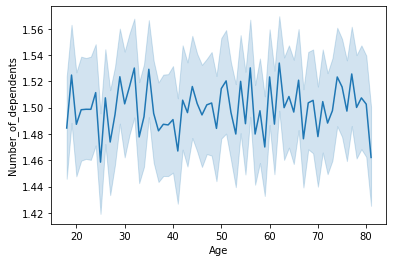

In [34]:
line_Age_dependents = sns.lineplot(data = df_cust, x = 'Age',y = 'Number_of_dependents')

In [35]:
line_Age_dependents.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_Age_dependents.png'))

### With this graph it does not seem like there is really any corelations from age to dependents

## You’ll also need to explore whether there’s a connection between age and spending power. To visualize this relationship, create a scatterplot using the sns.scatterplot() function.

In [38]:
customer_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32404859 entries, 0 to 32404858
Data columns (total 33 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   user_id                 int64   
 1   First Name              object  
 2   Surnam                  object  
 3   Gender                  object  
 4   STATE                   object  
 5   Age                     int64   
 6   date_joined             object  
 7   n_dependants            int64   
 8   fam_status              object  
 9   income                  int64   
 10  product_id              int64   
 11  product_name            object  
 12  aisle_id                float64 
 13  department_id           float64 
 14  prices                  float64 
 15  order_id                int64   
 16  order_number            int64   
 17  orders_day_of_week      int64   
 18  order_hour_of_day       int64   
 19  days_since_prior_order  float64 
 20  add_to_cart_order       int64   
 21  reorde

In [39]:
customer_merged['spending_flag'].value_counts()

High spender    31770767
Low spender       634092
Name: spending_flag, dtype: int64

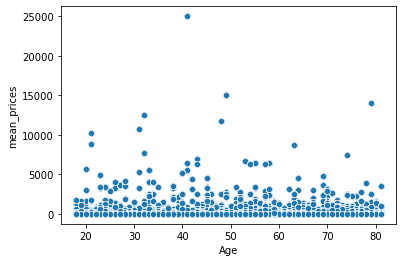

In [42]:
scatterplot_Age_Average_spending = sns.scatterplot(x = 'Age', y = 'mean_prices',data = customer_merged)

In [43]:
scatterplot_Age_Average_spending.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scatterplot_Age_Average_spending.png'))

### This graoh shows mean prices to age honestly there is really no corelation between these numbers